# LSTM

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


# There is a warning as there is 1 extra column containing only 0 that does not have a header
df = pd.read_csv('../../data/INFY.csv', index_col=False)
#df = df.iloc[:, :-1]
df = df[['open', 'high', 'low', 'close', 'volume']]
df.head()

,open,high,low,close,volume
0,1514.00,1526.50,1504.05,1524.00,3801140
1,1519.85,1532.65,1515.10,1522.55,4551130
2,1521.00,1521.00,1491.10,1494.80,7059590
3,1505.90,1505.90,1469.25,1475.20,9868404
4,1470.00,1475.00,1446.50,1448.50,6443714


In [3]:
df.describe()

,open,high,low,close,volume
count,246.000000,246.000000,246.000000,246.000000,2.460000e+02
mean,1416.604268,1427.244309,1404.570732,1416.486585,6.494948e+06
std,97.373470,99.250121,96.127301,97.746830,4.778379e+06
min,1225.950000,1230.000000,1185.300000,1223.400000,5.722980e+05
25%,1342.662500,1350.225000,1331.862500,1344.212500,4.218828e+06
50%,1424.500000,1434.500000,1411.400000,1423.575000,5.584064e+06
75%,1484.725000,1496.750000,1468.825000,1483.487500,7.369245e+06
max,1612.950000,1619.750000,1597.850000,1617.000000,5.317170e+07


## Convert to Normalized Value

In [4]:
# Normalize all features between 0 and 1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Keep the original close prices for later inverse transform
close_scaler = MinMaxScaler()
close_scaler.fit(df[['close']])

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [5]:
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])               # 15-day window
        y.append(data[i+seq_length][3])              # 'close' is at index 3
    return np.array(x), np.array(y)

SEQ_LEN = 15
X, y = create_sequences(scaled_data, SEQ_LEN)

# Split into train and test
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [6]:
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(SEQ_LEN, 5)))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output: next day's close

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


c:\Users\Adwait\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,251 (43.95 KB)

 Trainable params: 11,251 (43.95 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=20, batch_size=16)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.1527 - val_loss: 0.0191
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0312 - val_loss: 0.0124
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0147 - val_loss: 0.0153
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0133 - val_loss: 0.0087
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0134 - val_loss: 0.0093
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0119 - val_loss: 0.0080
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0110 - val_loss: 0.0088
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0097 - val_loss: 0.0083
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0114 - val_loss: 0.0066
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0096 - val_loss: 0.0069
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0101 - val_loss: 0.0073
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0

In [8]:
# Predict on test data
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_inv = close_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = close_scaler.inverse_transform(y_test.reshape(-1, 1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


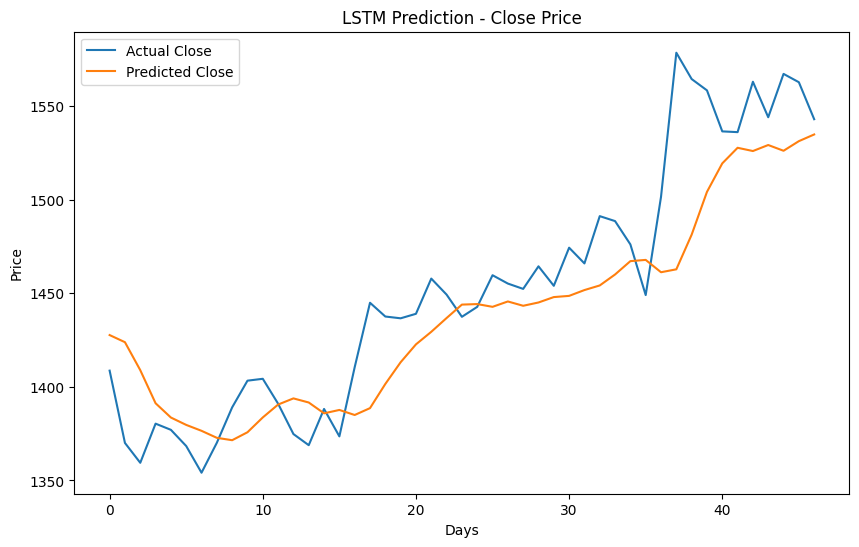

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual Close')
plt.plot(y_pred_inv, label='Predicted Close')
plt.title("LSTM Prediction - Close Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()